# Python Movies Correlation

In [159]:
#Import libraries

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) #Adjust configuration of the plots we will create

# Read Data

df = pd.read_csv(r"C:\Users\salat\Downloads\movies.csv\movies.csv")

In [160]:
# Look at data

df.head(10)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
5,Friday the 13th,R,Horror,1980,"May 9, 1980 (United States)",6.4,123000.0,Sean S. Cunningham,Victor Miller,Betsy Palmer,United States,550000.0,39754601.0,Paramount Pictures,95.0
6,The Blues Brothers,R,Action,1980,"June 20, 1980 (United States)",7.9,188000.0,John Landis,Dan Aykroyd,John Belushi,United States,27000000.0,115229890.0,Universal Pictures,133.0
7,Raging Bull,R,Biography,1980,"December 19, 1980 (United States)",8.2,330000.0,Martin Scorsese,Jake LaMotta,Robert De Niro,United States,18000000.0,23402427.0,Chartoff-Winkler Productions,129.0
8,Superman II,PG,Action,1980,"June 19, 1981 (United States)",6.8,101000.0,Richard Lester,Jerry Siegel,Gene Hackman,United States,54000000.0,108185706.0,Dovemead Films,127.0
9,The Long Riders,R,Biography,1980,"May 16, 1980 (United States)",7.0,10000.0,Walter Hill,Bill Bryden,David Carradine,United States,10000000.0,15795189.0,United Artists,100.0


In [161]:
#Checking missing data

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

name - 0%
rating - 1%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 28%
gross - 2%
company - 0%
runtime - 0%


In [162]:
# Removing missing data
df=df.dropna()
#df.fillna(df.mean(), inplace=True)

In [163]:
# Double check of missing values
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

name - 0%
rating - 0%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 0%
gross - 0%
company - 0%
runtime - 0%


In [164]:
# Extracting the released year + (new column yearcorrect)

df['yearcorrect'] = df['released'].str.extract(pat = '([0-9]{4})').astype(str)

In [165]:
## Data Types for our columns

print(df.dtypes)

name            object
rating          object
genre           object
year             int64
released        object
score          float64
votes          float64
director        object
writer          object
star            object
country         object
budget         float64
gross          float64
company         object
runtime        float64
yearcorrect     object
dtype: object


In [166]:
# Change data type in columns

df['budget'] = pd.to_numeric(df['budget'], errors='coerce').fillna(0).astype(int)
df['gross'] = pd.to_numeric(df['gross'], errors='coerce').fillna(0).astype(int)

df.head(10)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980
5,Friday the 13th,R,Horror,1980,"May 9, 1980 (United States)",6.4,123000.0,Sean S. Cunningham,Victor Miller,Betsy Palmer,United States,550000,39754601,Paramount Pictures,95.0,1980
6,The Blues Brothers,R,Action,1980,"June 20, 1980 (United States)",7.9,188000.0,John Landis,Dan Aykroyd,John Belushi,United States,27000000,115229890,Universal Pictures,133.0,1980
7,Raging Bull,R,Biography,1980,"December 19, 1980 (United States)",8.2,330000.0,Martin Scorsese,Jake LaMotta,Robert De Niro,United States,18000000,23402427,Chartoff-Winkler Productions,129.0,1980
8,Superman II,PG,Action,1980,"June 19, 1981 (United States)",6.8,101000.0,Richard Lester,Jerry Siegel,Gene Hackman,United States,54000000,108185706,Dovemead Films,127.0,1981
9,The Long Riders,R,Biography,1980,"May 16, 1980 (United States)",7.0,10000.0,Walter Hill,Bill Bryden,David Carradine,United States,10000000,15795189,United Artists,100.0,1980


In [167]:
# Move columns
new_columns = ['budget','company','country','director','genre','gross','name','rating','released','runtime','score','star','votes','writer','year','yearcorrect']
df = df[new_columns]
df.head(10)

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,yearcorrect
0,19000000,Warner Bros.,United Kingdom,Stanley Kubrick,Drama,46998772,The Shining,R,"June 13, 1980 (United States)",146.0,8.4,Jack Nicholson,927000.0,Stephen King,1980,1980
1,4500000,Columbia Pictures,United States,Randal Kleiser,Adventure,58853106,The Blue Lagoon,R,"July 2, 1980 (United States)",104.0,5.8,Brooke Shields,65000.0,Henry De Vere Stacpoole,1980,1980
2,18000000,Lucasfilm,United States,Irvin Kershner,Action,538375067,Star Wars: Episode V - The Empire Strikes Back,PG,"June 20, 1980 (United States)",124.0,8.7,Mark Hamill,1200000.0,Leigh Brackett,1980,1980
3,3500000,Paramount Pictures,United States,Jim Abrahams,Comedy,83453539,Airplane!,PG,"July 2, 1980 (United States)",88.0,7.7,Robert Hays,221000.0,Jim Abrahams,1980,1980
4,6000000,Orion Pictures,United States,Harold Ramis,Comedy,39846344,Caddyshack,R,"July 25, 1980 (United States)",98.0,7.3,Chevy Chase,108000.0,Brian Doyle-Murray,1980,1980
5,550000,Paramount Pictures,United States,Sean S. Cunningham,Horror,39754601,Friday the 13th,R,"May 9, 1980 (United States)",95.0,6.4,Betsy Palmer,123000.0,Victor Miller,1980,1980
6,27000000,Universal Pictures,United States,John Landis,Action,115229890,The Blues Brothers,R,"June 20, 1980 (United States)",133.0,7.9,John Belushi,188000.0,Dan Aykroyd,1980,1980
7,18000000,Chartoff-Winkler Productions,United States,Martin Scorsese,Biography,23402427,Raging Bull,R,"December 19, 1980 (United States)",129.0,8.2,Robert De Niro,330000.0,Jake LaMotta,1980,1980
8,54000000,Dovemead Films,United States,Richard Lester,Action,108185706,Superman II,PG,"June 19, 1981 (United States)",127.0,6.8,Gene Hackman,101000.0,Jerry Siegel,1980,1981
9,10000000,United Artists,United States,Walter Hill,Biography,15795189,The Long Riders,R,"May 16, 1980 (United States)",100.0,7.0,David Carradine,10000.0,Bill Bryden,1980,1980


In [168]:
print(df.dtypes)

budget           int32
company         object
country         object
director        object
genre           object
gross            int32
name            object
rating          object
released        object
runtime        float64
score          float64
star            object
votes          float64
writer          object
year             int64
yearcorrect     object
dtype: object


In [110]:
#change data type 'votes'
df['votes'] = df['votes'].fillna(0).astype(int)
print(df.dtypes)

budget           int32
company         object
country         object
director        object
genre           object
gross            int32
name            object
rating          object
released        object
runtime        float64
score          float64
star            object
votes            int32
writer          object
year             int64
yearcorrect     object
dtype: object


In [169]:
df.sort_values(by = ['gross'], inplace = False,ascending = False)
df.head(10)

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,yearcorrect
0,19000000,Warner Bros.,United Kingdom,Stanley Kubrick,Drama,46998772,The Shining,R,"June 13, 1980 (United States)",146.0,8.4,Jack Nicholson,927000.0,Stephen King,1980,1980
1,4500000,Columbia Pictures,United States,Randal Kleiser,Adventure,58853106,The Blue Lagoon,R,"July 2, 1980 (United States)",104.0,5.8,Brooke Shields,65000.0,Henry De Vere Stacpoole,1980,1980
2,18000000,Lucasfilm,United States,Irvin Kershner,Action,538375067,Star Wars: Episode V - The Empire Strikes Back,PG,"June 20, 1980 (United States)",124.0,8.7,Mark Hamill,1200000.0,Leigh Brackett,1980,1980
3,3500000,Paramount Pictures,United States,Jim Abrahams,Comedy,83453539,Airplane!,PG,"July 2, 1980 (United States)",88.0,7.7,Robert Hays,221000.0,Jim Abrahams,1980,1980
4,6000000,Orion Pictures,United States,Harold Ramis,Comedy,39846344,Caddyshack,R,"July 25, 1980 (United States)",98.0,7.3,Chevy Chase,108000.0,Brian Doyle-Murray,1980,1980
5,550000,Paramount Pictures,United States,Sean S. Cunningham,Horror,39754601,Friday the 13th,R,"May 9, 1980 (United States)",95.0,6.4,Betsy Palmer,123000.0,Victor Miller,1980,1980
6,27000000,Universal Pictures,United States,John Landis,Action,115229890,The Blues Brothers,R,"June 20, 1980 (United States)",133.0,7.9,John Belushi,188000.0,Dan Aykroyd,1980,1980
7,18000000,Chartoff-Winkler Productions,United States,Martin Scorsese,Biography,23402427,Raging Bull,R,"December 19, 1980 (United States)",129.0,8.2,Robert De Niro,330000.0,Jake LaMotta,1980,1980
8,54000000,Dovemead Films,United States,Richard Lester,Action,108185706,Superman II,PG,"June 19, 1981 (United States)",127.0,6.8,Gene Hackman,101000.0,Jerry Siegel,1980,1981
9,10000000,United Artists,United States,Walter Hill,Biography,15795189,The Long Riders,R,"May 16, 1980 (United States)",100.0,7.0,David Carradine,10000.0,Bill Bryden,1980,1980


In [170]:
pd.set_option('display.max_rows', None)

In [171]:
df = df.sort_values(by = ['gross'], inplace = False,ascending = False)
df.head(10)

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,yearcorrect
6663,245000000,Lucasfilm,United States,J.J. Abrams,Action,2069521700,Star Wars: Episode VII - The Force Awakens,PG-13,"December 18, 2015 (United States)",138.0,7.8,Daisy Ridley,876000.0,Lawrence Kasdan,2015,2015
7244,321000000,Marvel Studios,United States,Anthony Russo,Action,2048359754,Avengers: Infinity War,PG-13,"April 27, 2018 (United States)",149.0,8.4,Robert Downey Jr.,897000.0,Christopher Markus,2018,2018
7480,260000000,Walt Disney Pictures,United States,Jon Favreau,Animation,1670727580,The Lion King,PG,"July 19, 2019 (United States)",118.0,6.9,Donald Glover,222000.0,Jeff Nathanson,2019,2019
6653,150000000,Universal Pictures,United States,Colin Trevorrow,Action,1670516444,Jurassic World,PG-13,"June 12, 2015 (United States)",124.0,7.0,Chris Pratt,593000.0,Rick Jaffa,2015,2015
6043,220000000,Marvel Studios,United States,Joss Whedon,Action,1518815515,The Avengers,PG-13,"May 4, 2012 (United States)",143.0,8.0,Robert Downey Jr.,1300000.0,Joss Whedon,2012,2012
6646,190000000,Universal Pictures,United States,James Wan,Action,1515341399,Furious 7,PG-13,"April 3, 2015 (United States)",137.0,7.1,Vin Diesel,370000.0,Chris Morgan,2015,2015
7494,150000000,Walt Disney Animation Studios,United States,Chris Buck,Animation,1450026933,Frozen II,PG,"November 22, 2019 (United States)",103.0,6.8,Kristen Bell,148000.0,Jennifer Lee,2019,2019
6644,250000000,Marvel Studios,United States,Joss Whedon,Action,1402809540,Avengers: Age of Ultron,PG-13,"May 1, 2015 (United States)",141.0,7.3,Robert Downey Jr.,777000.0,Joss Whedon,2015,2015
7247,200000000,Marvel Studios,United States,Ryan Coogler,Action,1347597973,Black Panther,PG-13,"February 16, 2018 (United States)",134.0,7.3,Chadwick Boseman,661000.0,Ryan Coogler,2018,2018
5845,125000000,Warner Bros.,United Kingdom,David Yates,Adventure,1342321665,Harry Potter and the Deathly Hallows: Part 2,PG-13,"July 15, 2011 (United States)",130.0,8.1,Daniel Radcliffe,790000.0,Steve Kloves,2011,2011


In [173]:
# Drop any duplicates

#df['company']=df['company'].drop_duplicates().sort_values(ascending = False)
df.drop_duplicates()
df.head(10)

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,yearcorrect
6663,245000000,Lucasfilm,United States,J.J. Abrams,Action,2069521700,Star Wars: Episode VII - The Force Awakens,PG-13,"December 18, 2015 (United States)",138.0,7.8,Daisy Ridley,876000.0,Lawrence Kasdan,2015,2015
7244,321000000,Marvel Studios,United States,Anthony Russo,Action,2048359754,Avengers: Infinity War,PG-13,"April 27, 2018 (United States)",149.0,8.4,Robert Downey Jr.,897000.0,Christopher Markus,2018,2018
7480,260000000,Walt Disney Pictures,United States,Jon Favreau,Animation,1670727580,The Lion King,PG,"July 19, 2019 (United States)",118.0,6.9,Donald Glover,222000.0,Jeff Nathanson,2019,2019
6653,150000000,Universal Pictures,United States,Colin Trevorrow,Action,1670516444,Jurassic World,PG-13,"June 12, 2015 (United States)",124.0,7.0,Chris Pratt,593000.0,Rick Jaffa,2015,2015
6043,220000000,Marvel Studios,United States,Joss Whedon,Action,1518815515,The Avengers,PG-13,"May 4, 2012 (United States)",143.0,8.0,Robert Downey Jr.,1300000.0,Joss Whedon,2012,2012
6646,190000000,Universal Pictures,United States,James Wan,Action,1515341399,Furious 7,PG-13,"April 3, 2015 (United States)",137.0,7.1,Vin Diesel,370000.0,Chris Morgan,2015,2015
7494,150000000,Walt Disney Animation Studios,United States,Chris Buck,Animation,1450026933,Frozen II,PG,"November 22, 2019 (United States)",103.0,6.8,Kristen Bell,148000.0,Jennifer Lee,2019,2019
6644,250000000,Marvel Studios,United States,Joss Whedon,Action,1402809540,Avengers: Age of Ultron,PG-13,"May 1, 2015 (United States)",141.0,7.3,Robert Downey Jr.,777000.0,Joss Whedon,2015,2015
7247,200000000,Marvel Studios,United States,Ryan Coogler,Action,1347597973,Black Panther,PG-13,"February 16, 2018 (United States)",134.0,7.3,Chadwick Boseman,661000.0,Ryan Coogler,2018,2018
5845,125000000,Warner Bros.,United Kingdom,David Yates,Adventure,1342321665,Harry Potter and the Deathly Hallows: Part 2,PG-13,"July 15, 2011 (United States)",130.0,8.1,Daniel Radcliffe,790000.0,Steve Kloves,2011,2011


In [ ]:
# Budget high correlation
#Company high correlation

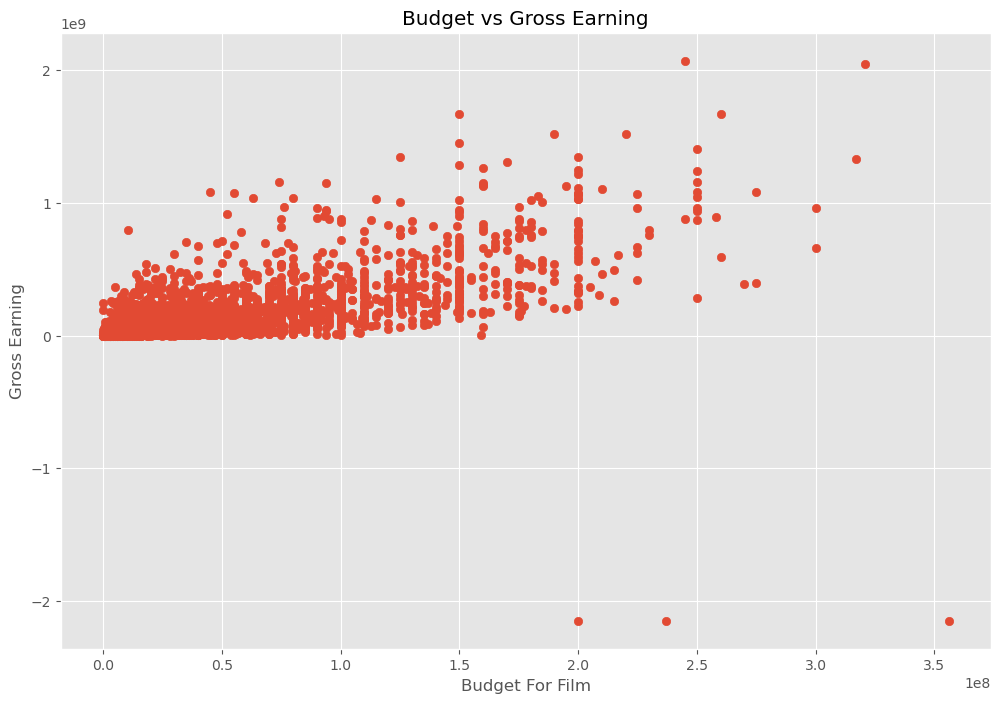

In [174]:
# Scatter plot with budget vs gross 

plt.scatter(x= df['budget'],y = df['gross'])
plt.title('Budget vs Gross Earning')
plt.xlabel('Budget For Film')
plt.ylabel('Gross Earning')

plt.show()

In [117]:
df.head(10)

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,yearcorrect
6663,245000000,Lucasfilm,United States,J.J. Abrams,Action,2069521700,Star Wars: Episode VII - The Force Awakens,PG-13,"December 18, 2015 (United States)",138.0,7.8,Daisy Ridley,876000,Lawrence Kasdan,2015,2015
7244,321000000,Marvel Studios,United States,Anthony Russo,Action,2048359754,Avengers: Infinity War,PG-13,"April 27, 2018 (United States)",149.0,8.4,Robert Downey Jr.,897000,Christopher Markus,2018,2018
7480,260000000,Walt Disney Pictures,United States,Jon Favreau,Animation,1670727580,The Lion King,PG,"July 19, 2019 (United States)",118.0,6.9,Donald Glover,222000,Jeff Nathanson,2019,2019
6653,150000000,Universal Pictures,United States,Colin Trevorrow,Action,1670516444,Jurassic World,PG-13,"June 12, 2015 (United States)",124.0,7.0,Chris Pratt,593000,Rick Jaffa,2015,2015
6043,220000000,Marvel Studios,United States,Joss Whedon,Action,1518815515,The Avengers,PG-13,"May 4, 2012 (United States)",143.0,8.0,Robert Downey Jr.,1300000,Joss Whedon,2012,2012
6646,190000000,Universal Pictures,United States,James Wan,Action,1515341399,Furious 7,PG-13,"April 3, 2015 (United States)",137.0,7.1,Vin Diesel,370000,Chris Morgan,2015,2015
7494,150000000,Walt Disney Animation Studios,United States,Chris Buck,Animation,1450026933,Frozen II,PG,"November 22, 2019 (United States)",103.0,6.8,Kristen Bell,148000,Jennifer Lee,2019,2019
6644,250000000,Marvel Studios,United States,Joss Whedon,Action,1402809540,Avengers: Age of Ultron,PG-13,"May 1, 2015 (United States)",141.0,7.3,Robert Downey Jr.,777000,Joss Whedon,2015,2015
7247,200000000,Marvel Studios,United States,Ryan Coogler,Action,1347597973,Black Panther,PG-13,"February 16, 2018 (United States)",134.0,7.3,Chadwick Boseman,661000,Ryan Coogler,2018,2018
5845,125000000,Warner Bros.,United Kingdom,David Yates,Adventure,1342321665,Harry Potter and the Deathly Hallows: Part 2,PG-13,"July 15, 2011 (United States)",130.0,8.1,Daniel Radcliffe,790000,Steve Kloves,2011,2011


In [175]:
#Apply N/A to negative budget
df['budget'] = df['budget'].apply(lambda x: np.nan if x < 0 else x)

In [176]:
#Apply N/A to negative gross
df['gross'] = df['gross'].apply(lambda x: np.nan if x < 0 else x)

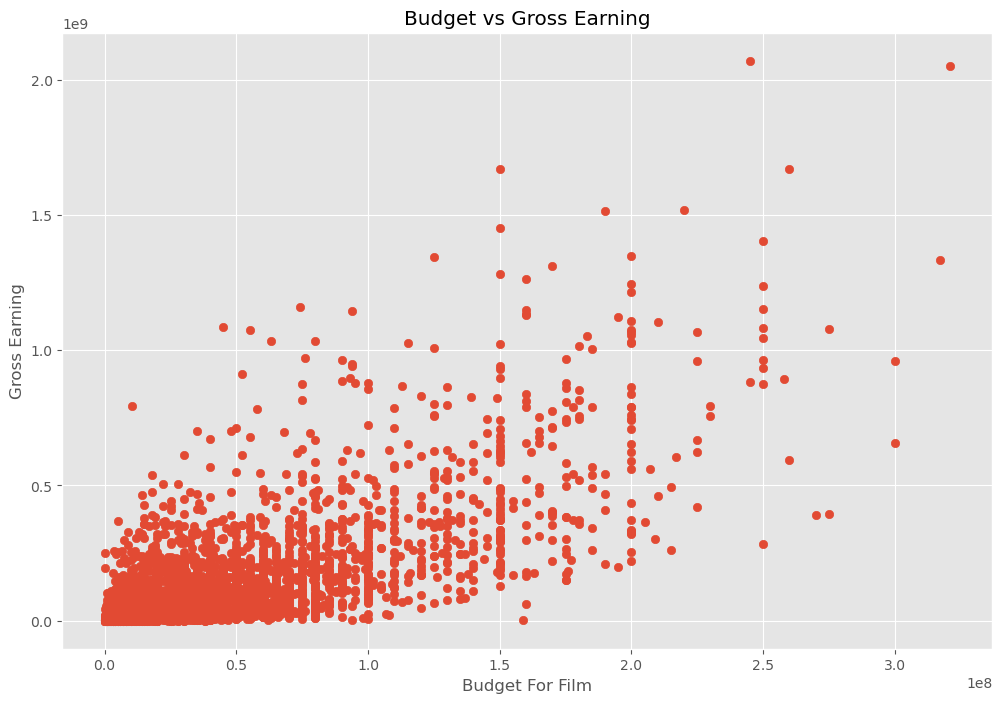

In [177]:
# Scatter plot with budget vs gross 

plt.scatter(x= df['budget'],y = df['gross'])
plt.title('Budget vs Gross Earning')
plt.xlabel('Budget For Film')
plt.ylabel('Gross Earning')

plt.show()

In [121]:
df.head(10)

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,yearcorrect
6663,245000000,Lucasfilm,United States,J.J. Abrams,Action,2.069522e+09,Star Wars: Episode VII - The Force Awakens,PG-13,"December 18, 2015 (United States)",138.0,7.8,Daisy Ridley,876000,Lawrence Kasdan,2015,2015
7244,321000000,Marvel Studios,United States,Anthony Russo,Action,2.048360e+09,Avengers: Infinity War,PG-13,"April 27, 2018 (United States)",149.0,8.4,Robert Downey Jr.,897000,Christopher Markus,2018,2018
7480,260000000,Walt Disney Pictures,United States,Jon Favreau,Animation,1.670728e+09,The Lion King,PG,"July 19, 2019 (United States)",118.0,6.9,Donald Glover,222000,Jeff Nathanson,2019,2019
6653,150000000,Universal Pictures,United States,Colin Trevorrow,Action,1.670516e+09,Jurassic World,PG-13,"June 12, 2015 (United States)",124.0,7.0,Chris Pratt,593000,Rick Jaffa,2015,2015
6043,220000000,Marvel Studios,United States,Joss Whedon,Action,1.518816e+09,The Avengers,PG-13,"May 4, 2012 (United States)",143.0,8.0,Robert Downey Jr.,1300000,Joss Whedon,2012,2012
6646,190000000,Universal Pictures,United States,James Wan,Action,1.515341e+09,Furious 7,PG-13,"April 3, 2015 (United States)",137.0,7.1,Vin Diesel,370000,Chris Morgan,2015,2015
7494,150000000,Walt Disney Animation Studios,United States,Chris Buck,Animation,1.450027e+09,Frozen II,PG,"November 22, 2019 (United States)",103.0,6.8,Kristen Bell,148000,Jennifer Lee,2019,2019
6644,250000000,Marvel Studios,United States,Joss Whedon,Action,1.402810e+09,Avengers: Age of Ultron,PG-13,"May 1, 2015 (United States)",141.0,7.3,Robert Downey Jr.,777000,Joss Whedon,2015,2015
7247,200000000,Marvel Studios,United States,Ryan Coogler,Action,1.347598e+09,Black Panther,PG-13,"February 16, 2018 (United States)",134.0,7.3,Chadwick Boseman,661000,Ryan Coogler,2018,2018
5845,125000000,Warner Bros.,United Kingdom,David Yates,Adventure,1.342322e+09,Harry Potter and the Deathly Hallows: Part 2,PG-13,"July 15, 2011 (United States)",130.0,8.1,Daniel Radcliffe,790000,Steve Kloves,2011,2011


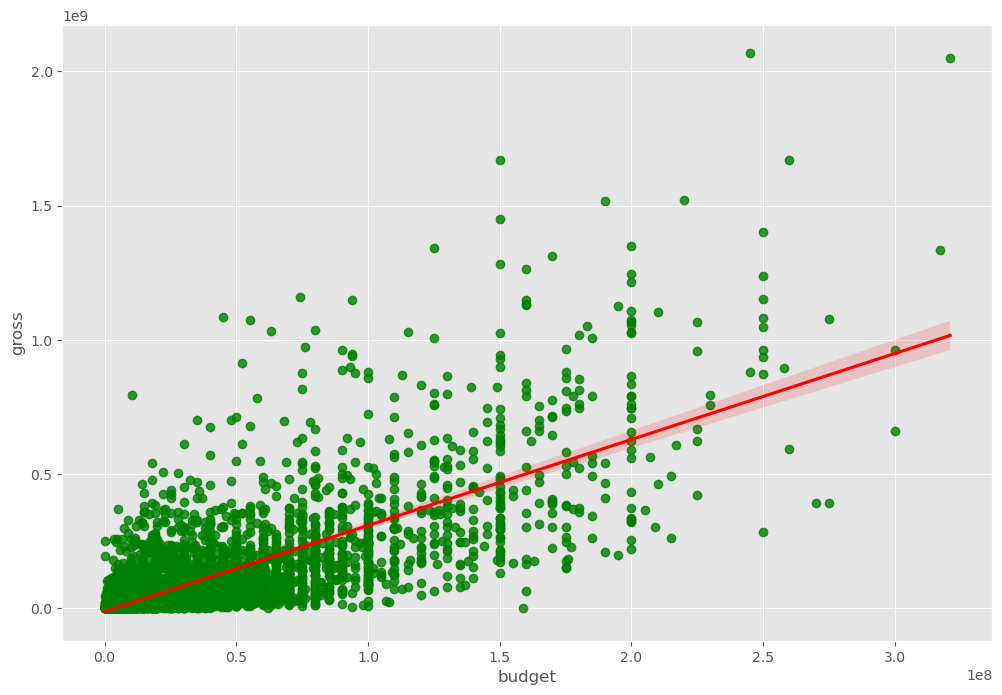

In [178]:
# Plot the Budget vs Gross using seaborn

sns.regplot(x='budget', y='gross', data=df, scatter_kws={"color": "green"},line_kws={"color":"red"})
plt.show()

In [179]:
#Looking at correlation

# Select only numeric columns
numeric_df = df.select_dtypes(include=[float, int])

# Calculate the correlation matrix for numeric columns  #pearon(default),kendall,spearman
correlation_matrix = numeric_df.corr(method='pearson')

print(correlation_matrix)

           budget     gross   runtime     score     votes      year
budget   1.000000  0.743536  0.318695  0.072001  0.439675  0.327722
gross    0.743536  1.000000  0.261947  0.221701  0.613791  0.283780
runtime  0.318695  0.261947  1.000000  0.414068  0.352303  0.075077
score    0.072001  0.221701  0.414068  1.000000  0.474256  0.056386
votes    0.439675  0.613791  0.352303  0.474256  1.000000  0.206021
year     0.327722  0.283780  0.075077  0.056386  0.206021  1.000000


In [ ]:
#High correlation between budget and gross

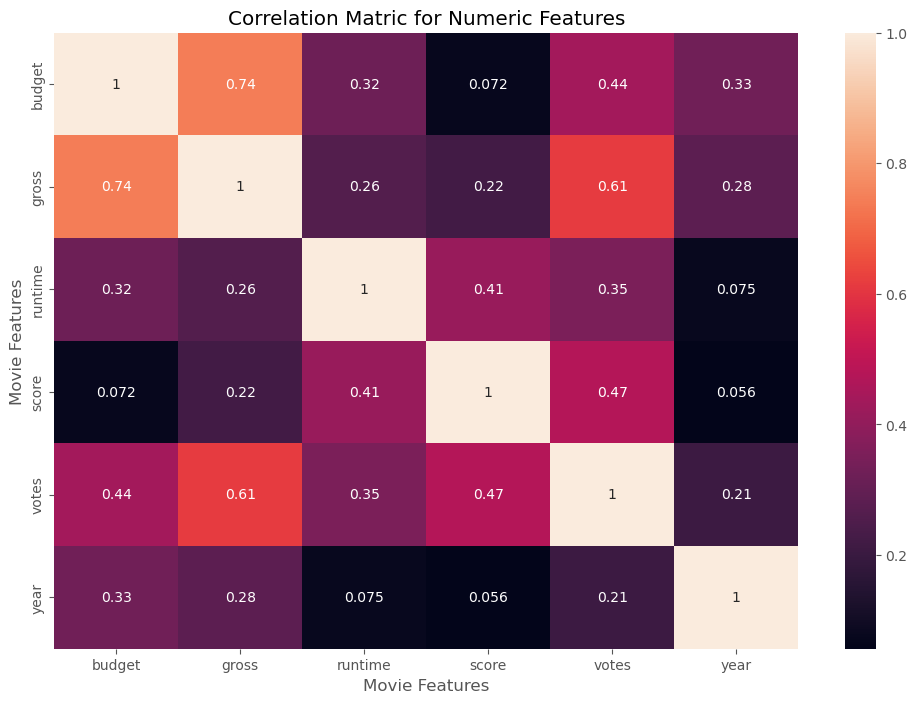

In [180]:
# Visualization of correlation_matrix

sns.heatmap(correlation_matrix,annot =True)

plt.title('Correlation Matric for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

plt.show()

In [145]:
# Look at Company
df.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,yearcorrect
0,19000000,Warner Bros.,United Kingdom,Stanley Kubrick,Drama,46998772,The Shining,R,"June 13, 1980 (United States)",146.0,8.4,Jack Nicholson,927000.0,Stephen King,1980,1980
1,4500000,Columbia Pictures,United States,Randal Kleiser,Adventure,58853106,The Blue Lagoon,R,"July 2, 1980 (United States)",104.0,5.8,Brooke Shields,65000.0,Henry De Vere Stacpoole,1980,1980
2,18000000,Lucasfilm,United States,Irvin Kershner,Action,538375067,Star Wars: Episode V - The Empire Strikes Back,PG,"June 20, 1980 (United States)",124.0,8.7,Mark Hamill,1200000.0,Leigh Brackett,1980,1980
3,3500000,Paramount Pictures,United States,Jim Abrahams,Comedy,83453539,Airplane!,PG,"July 2, 1980 (United States)",88.0,7.7,Robert Hays,221000.0,Jim Abrahams,1980,1980
4,6000000,Orion Pictures,United States,Harold Ramis,Comedy,39846344,Caddyshack,R,"July 25, 1980 (United States)",98.0,7.3,Chevy Chase,108000.0,Brian Doyle-Murray,1980,1980


In [ ]:
# Using factorize - this assigns a random numeric value for each unique categorical value

#df.apply(lambda x: x.factorize()[0]).corr(method='pearson')

In [181]:
#Apply numeric values
df_numerized = df 

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name]= df_numerized[col_name].cat.codes
df_numerized.head(10)

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,yearcorrect
6663,245000000,945,47,768,0,2.069522e+09,3643,5,529,138.0,7.8,356,876000.0,1806,2015,35
7244,321000000,983,47,105,0,2.048360e+09,389,5,145,149.0,8.4,1470,897000.0,513,2018,38
7480,260000000,1423,47,1012,2,1.670728e+09,4388,4,1126,118.0,6.9,457,222000.0,1361,2019,39
6653,150000000,1397,47,335,0,1.670516e+09,2117,5,1303,124.0,7.0,293,593000.0,2523,2015,35
6043,220000000,983,47,1060,0,1.518816e+09,3878,5,1899,143.0,8.0,1470,1300000.0,1646,2012,32
6646,190000000,1397,47,809,0,1.515341e+09,1541,5,165,137.0,7.1,1785,370000.0,481,2015,35
7494,150000000,1422,47,277,2,1.450027e+09,1530,4,2053,103.0,6.8,1036,148000.0,1383,2019,39
6644,250000000,983,47,1060,0,1.402810e+09,387,5,1712,141.0,7.3,1470,777000.0,1646,2015,35
7247,200000000,983,47,1716,0,1.347598e+09,567,5,723,134.0,7.3,260,661000.0,2687,2018,38
5845,125000000,1426,46,452,1,1.342322e+09,1731,5,1092,130.0,8.1,379,790000.0,2862,2011,31


In [182]:
df_numerized.sort_values(by = ['gross'], inplace = False,ascending = False)
df_numerized.head(10)

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,yearcorrect
6663,245000000,945,47,768,0,2.069522e+09,3643,5,529,138.0,7.8,356,876000.0,1806,2015,35
7244,321000000,983,47,105,0,2.048360e+09,389,5,145,149.0,8.4,1470,897000.0,513,2018,38
7480,260000000,1423,47,1012,2,1.670728e+09,4388,4,1126,118.0,6.9,457,222000.0,1361,2019,39
6653,150000000,1397,47,335,0,1.670516e+09,2117,5,1303,124.0,7.0,293,593000.0,2523,2015,35
6043,220000000,983,47,1060,0,1.518816e+09,3878,5,1899,143.0,8.0,1470,1300000.0,1646,2012,32
6646,190000000,1397,47,809,0,1.515341e+09,1541,5,165,137.0,7.1,1785,370000.0,481,2015,35
7494,150000000,1422,47,277,2,1.450027e+09,1530,4,2053,103.0,6.8,1036,148000.0,1383,2019,39
6644,250000000,983,47,1060,0,1.402810e+09,387,5,1712,141.0,7.3,1470,777000.0,1646,2015,35
7247,200000000,983,47,1716,0,1.347598e+09,567,5,723,134.0,7.3,260,661000.0,2687,2018,38
5845,125000000,1426,46,452,1,1.342322e+09,1731,5,1092,130.0,8.1,379,790000.0,2862,2011,31


In [148]:
df_numerized.head(10)

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,yearcorrect
0,19000000,1426,46,1795,6,46998772,4692,6,1304,146.0,8.4,699,927000.0,2832,1980,0
1,4500000,452,47,1578,1,58853106,3929,6,1127,104.0,5.8,214,65000.0,1158,1980,0
2,18000000,945,47,757,0,538375067,3641,4,1359,124.0,8.7,1157,1200000.0,1818,1980,0
3,3500000,1108,47,889,4,83453539,204,4,1127,88.0,7.7,1474,221000.0,1413,1980,0
4,6000000,1083,47,719,4,39846344,732,6,1170,98.0,7.3,271,108000.0,351,1980,0
5,550000,1108,47,1758,9,39754601,1509,6,1922,95.0,6.4,155,123000.0,3081,1980,0
6,27000000,1397,47,974,0,115229890,3930,6,1359,133.0,7.9,860,188000.0,576,1980,0
7,18000000,390,47,1269,3,23402427,3122,6,530,129.0,8.2,1469,330000.0,1257,1980,0
8,54000000,548,47,1606,0,108185706,3732,4,1346,127.0,6.8,595,101000.0,1402,1980,1
9,10000000,1391,47,2011,3,15795189,4401,6,1755,100.0,7.0,402,10000.0,280,1980,0


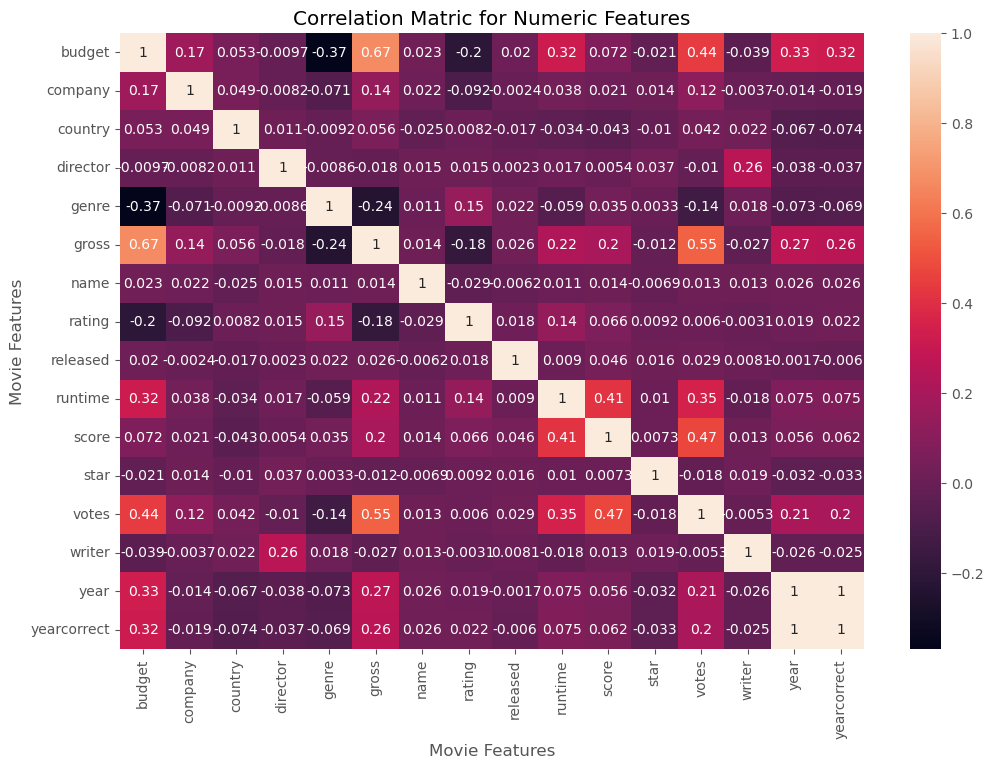

               budget   company   country  director     genre     gross  \
budget       1.000000  0.170235  0.052977 -0.009662 -0.368523  0.669203   
company      0.170235  1.000000  0.048569 -0.008223 -0.071334  0.140055   
country      0.052977  0.048569  1.000000  0.011133 -0.009164  0.055859   
director    -0.009662 -0.008223  0.011133  1.000000 -0.008553 -0.017821   
genre       -0.368523 -0.071334 -0.009164 -0.008553  1.000000 -0.238629   
gross        0.669203  0.140055  0.055859 -0.017821 -0.238629  1.000000   
name         0.023392  0.021697 -0.025490  0.015246  0.010996  0.014073   
rating      -0.203946 -0.092357  0.008230  0.014656  0.147796 -0.180805   
released     0.019952 -0.002407 -0.017228  0.002308  0.022142  0.025636   
runtime      0.318695  0.037585 -0.034477  0.017433 -0.059237  0.223667   
score        0.072001  0.020656 -0.043051  0.005413  0.035106  0.201086   
star        -0.021473  0.014082 -0.009990  0.036593  0.003341 -0.011854   
votes        0.439675  0.

In [150]:
# Calculate the correlation matrix for numeric columns  #pearon(default),kendall,spearman
correlation_matrix = df_numerized.corr(method='pearson')

sns.heatmap(correlation_matrix,annot =True)

plt.title('Correlation Matric for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

plt.show()


print(correlation_matrix)

In [183]:
# Filter down 
correlation_mat = df_numerized.corr()
corr_pairs = correlation_mat.unstack()
corr_pairs

budget       budget         1.000000
             company        0.170235
             country        0.052977
             director      -0.009662
             genre         -0.368523
             gross          0.743536
             name           0.023392
             rating        -0.203946
             released       0.019952
             runtime        0.318695
             score          0.072001
             star          -0.021473
             votes          0.439675
             writer        -0.039466
             year           0.327722
             yearcorrect    0.320312
company      budget         0.170235
             company        1.000000
             country        0.048569
             director      -0.008223
             genre         -0.071334
             gross          0.151729
             name           0.021697
             rating        -0.092357
             released      -0.002407
             runtime        0.037585
             score          0.020656
 

In [185]:
# Sorting
sorted_pairs = corr_pairs.sort_values()
sorted_pairs

budget       genre         -0.368523
genre        budget        -0.368523
             gross         -0.252619
gross        genre         -0.252619
rating       budget        -0.203946
budget       rating        -0.203946
rating       gross         -0.190168
gross        rating        -0.190168
genre        votes         -0.135990
votes        genre         -0.135990
rating       company       -0.092357
company      rating        -0.092357
yearcorrect  country       -0.073569
country      yearcorrect   -0.073569
year         genre         -0.073167
genre        year          -0.073167
             company       -0.071334
company      genre         -0.071334
genre        yearcorrect   -0.069147
yearcorrect  genre         -0.069147
year         country       -0.066748
country      year          -0.066748
runtime      genre         -0.059237
genre        runtime       -0.059237
score        country       -0.043051
country      score         -0.043051
writer       budget        -0.039466
b

In [186]:
# Checking high correlation 
high_corr = sorted_pairs[(sorted_pairs)> 0.5]
high_corr

votes        gross          0.613791
gross        votes          0.613791
             budget         0.743536
budget       gross          0.743536
yearcorrect  year           0.998726
year         yearcorrect    0.998726
budget       budget         1.000000
writer       writer         1.000000
votes        votes          1.000000
star         star           1.000000
score        score          1.000000
runtime      runtime        1.000000
released     released       1.000000
rating       rating         1.000000
name         name           1.000000
gross        gross          1.000000
genre        genre          1.000000
director     director       1.000000
country      country        1.000000
company      company        1.000000
year         year           1.000000
yearcorrect  yearcorrect    1.000000
dtype: float64

In [ ]:
## Votes and gross have a high correlation. As the number of votes increases, the gross earnings tend to increase as well.
## Budget and gross have a high correlation. This suggests that movies with higher budgets tend to have higher gross earnings.
## Self-Correlation(1.00..)All variables are perfectly correlated with themselves, as expected.